In [43]:
# Importing all the required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from kerastuner.tuners import RandomSearch
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, classification_report

# Step 1 - Data Preprocessing

In [2]:
# Reading and displying the dataset
data = pd.read_csv('BankCustomers.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Returns basic information on all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### We can see that Geography and Gender are categorical in nature, So we will encode them

In [4]:
print(data.shape) #Shape of data (rows, columns)

(10000, 14)


In [5]:
# Returns statistics on Object type values of columns
data.describe(include=['O']).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [6]:
# Returns statistics on numeric type values of columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [7]:
# Returns total sum of total null values in each column
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### We don't have any missing values

In [8]:
# Returns If 0 as True else False in each column
data.eq(0).any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure              True
Balance             True
NumOfProducts      False
HasCrCard           True
IsActiveMember      True
EstimatedSalary    False
Exited              True
dtype: bool

# Data Visualization

In [9]:
# Returns the count plot
def plot_categorical(feature , dataset):
    ax = sns.countplot(y=feature, data=dataset)
    plt.title('Distribution of ' + feature)
    plt.xlabel('Count')

    total = len(dataset[feature])
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 *p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))

    plt.show()

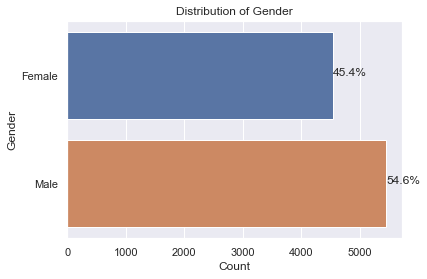

In [10]:
# Visualising the column 'gender' using Countplot
plot_categorical('Gender' , data)

#### The total Count of Male are present then compare to female in dataset

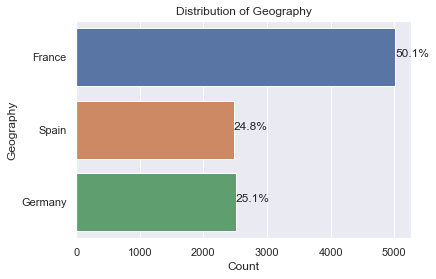

In [11]:
# Visualising the column 'Geography' using Countplot
plot_categorical('Geography' , data)

#### The total Count of France is high in dataset

In [12]:
def bar_chart(data,feature):
    Exited = data[data['Exited'] == 1][feature].value_counts()
    NotExited = data[data['Exited'] == 0][feature].value_counts()
    df = pd.DataFrame([Exited, NotExited])
    df.index = ['Exited','NotExited']
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))

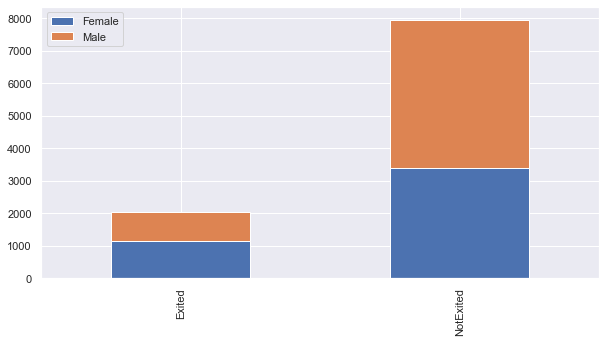

In [13]:
bar_chart(data,'Gender')

Gender plot with Exited - Observation

From the Count plot we observed that the number of Female are more likely exited Then Male.

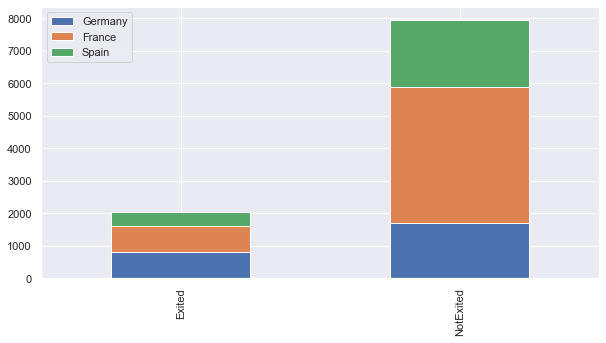

In [14]:
bar_chart(data,'Geography')

Geography plot with Exited - Observation

From the Count plot we observed that more likely Germany and France Countries Exited more then Spain

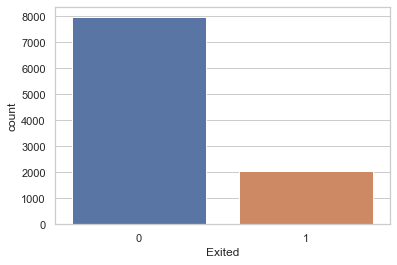

In [15]:
# Visualising the column 'gender' using Countplot
sns.set_style('whitegrid')
sns.countplot(data.Exited)
plt.show()

#### We can observe that our Exited data is imbalance, the number of 0 are more then 1, we can balance the data using SMOTH method

In [16]:
X = data.iloc[:,3:-1].values
y = data.iloc[:,-1].values

In [17]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


### Label Encoder for Gender

In [18]:
# Encoded female into 0 and Male to 1
le = LabelEncoder()
le.fit(X[:,2])
X[:,2] = le.transform(X[:,2])

In [19]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


### One-hot Encoding for Geography Column

In [20]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [21]:
print(X.shape)

(10000, 12)


In [22]:
"""from imblearn.over_sampling import SMOTE
import collections
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', collections.Counter(y))
print('Resample dataset shape', collections.Counter(y_smote))"""

"from imblearn.over_sampling import SMOTE\nimport collections\nsmote = SMOTE()\n\n# fit predictor and target variable\nx_smote, y_smote = smote.fit_resample(X, y)\n\nprint('Original dataset shape', collections.Counter(y))\nprint('Resample dataset shape', collections.Counter(y_smote))"

## Split dataset into training and testing

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [24]:
# We scale all features irrespective of their data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### ---------------------- End of Data Preprocessing   ---------------------------

## Step 2 - Building a ANN

### Intialize the ANN as layers using Keras Tuner

In [25]:
#Intialize the ANN as layers using Keras Tuner
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units = hp.Int('units_'+str(i), min_value=6, 
                                                        max_value=60, 
                                                        step=6), 
                                                        activation = 'relu',
                                                        input_shape = (X_train.shape[1],)))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    model.compile(optimizer = Adam(hp.Choice('learning_rate',[1e-2, 1e-3, 1e-4])),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])
    return model

In [26]:
tuner = RandomSearch(build_model,
                    objective = 'val_accuracy',
                    max_trials = 6,
                    executions_per_trial = 2,
                    directory = 'project',
                    project_name = 'Bank_Customer_Churn') 

In [27]:
earlystop = EarlyStopping(monitor='val_loss', patience=5)

In [28]:
tuner.search(X_train, y_train, 
             epochs=20, callbacks= [earlystop],
             validation_data = (X_test, y_test))

Trial 6 Complete [00h 00m 30s]
val_accuracy: 0.8600000143051147

Best val_accuracy So Far: 0.867249995470047
Total elapsed time: 00h 02m 14s
INFO:tensorflow:Oracle triggered exit


## Step 3 - Training the ANN

In [29]:
best_model = tuner.get_best_models(1)[0]

In [30]:
history = best_model.fit(X_train, y_train, batch_size=32, epochs=100, callbacks= [earlystop],validation_data = (X_test, y_test))

Epoch 1/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.8575 - val_loss: 0.3452 - val_accuracy: 0.8695
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3461 - accuracy: 0.8635 - val_loss: 0.3408 - val_accuracy: 0.8585
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3437 - accuracy: 0.8637 - val_loss: 0.3398 - val_accuracy: 0.8615
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3454 - accuracy: 0.8631 - val_loss: 0.3459 - val_accuracy: 0.8595
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3383 - accuracy: 0.8645 - val_loss: 0.3571 - val_accuracy: 0.8575
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3402 - accuracy: 0.8614 - val_loss: 0.3483 - val_accuracy: 0.8610
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3395 - accuracy: 0.8665 - val_loss: 0.3463 - val_accuracy: 0.8600

## Part 4 - Making the predictions

In [31]:
# For single test case
result = best_model.predict(sc.transform([[0,0,1,608,0,41,1,83807.86,1,0,1,112542.58]]))
print(result > 0.5)

[[False]]


#### Result is False so customer will not leave the bank

In [38]:
# For single test case
result = best_model.predict(sc.transform([[1,0,0,502,0,42,8,159660.80,3,1,0,113931.57]]))
print(result > 0.5)

[[ True]]


#### Result is True so customer will leave the bank

In [32]:
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


### Step 5 - Evaluating the model

#### Confusion Matrix

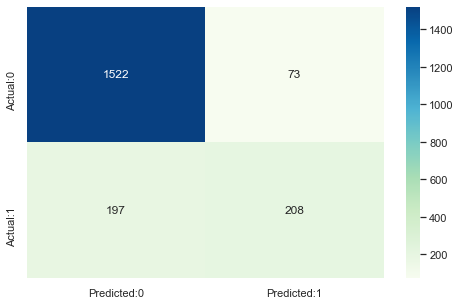

In [33]:
cm = confusion_matrix(y_test,y_pred)

conf_matrix = pd.DataFrame(data=cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix,annot=True,fmt='d', cmap='GnBu')
plt.show()


#### Classification Report

In [45]:
class_report = classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.74      0.51      0.61       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.86      0.86      2000



#### ROC Curve

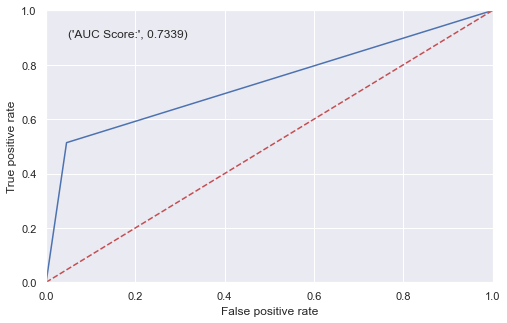

In [48]:

plt.rcParams['figure.figsize'] = (8,5)

fpr, tpr, thresholds = roc_curve(y_test,y_pred)

# plot the roc curve
plt.plot(fpr,tpr,'b-')

# Set limits
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

# Plot a 45 deg line
plt.plot([0,1],[0,1],'r--')

# Add auc score
plt.text(x = 0.05, y = 0.9, s= ('AUC Score:', round(roc_auc_score(y_test,y_pred),4)))

# name of plot and axes
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

# Plot grid
#plt.grid(True)
plt.show()

A good classifier stays as far away from that line as possible (toward the top-left corner)